# Import Modules

In [1]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Connect to Coppelia

In [3]:
client = RemoteAPIClient()
sim = client.require('sim')
sim.setStepping(True)

0

# Codding to Plot

In [4]:
# Apenas para visualização de um referencial no plano
def plot_frame(Porg, R, c=['r', 'g']):
    
    axis_size = 3.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

In [5]:
def plot3CompostTransformation(middleMatrix, destMatrix):
    aorg = np.array([0, 0])
    

    # Definindo Tbc
    Tbc = destMatrix
    pb_corg = Tbc[0:3, 3]
    Rbc = Tbc[:3,:3]

    # Definindo Tab
    Tab = middleMatrix
    pa_borg = Tab[:3, 3]
    Rab = Tab[:3,:3]
    
    # Definindo Tac
    Tac = Tab @ Tbc
    
    # Plotando os referenciais
    #plt.figure()

    # The rotation matrix contain the axis orientation
    # Frame C->B
    pa_corg = np.array(Tac[:,3])
    ## Vector from the origin B to origin C from the perpective of A
    pb_corg_aux = Rab @ pb_corg
    Rac = Tac[:3,:3]
    ## plot the C axis and the vector from the B axis to C axis
    plot_frame(pa_corg, Rac, ['g', 'g'])
    plt.quiver(*pa_borg[:2], *pb_corg_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)

    # Frame B->A
    plot_frame(pa_borg, Rab, ['b', 'b'])
    plt.quiver(*aorg, *pa_borg[:2], color='b', angles='xy', scale_units='xy', scale=1)

    plt.axis('scaled')
    plt.axis((-15, 15, -15, 15))
    

# Codding to calculate the Transformation Matrix

In [6]:
# Function the invert a matrix
def invertMatrix(M):
    return np.linalg.inv(M)

In [7]:
# Get Object Position and Orientation
def getPositionAndOrientation(handle, referenceTo):
    pos = sim.getObjectPosition(handle, referenceTo)
    ori = sim.getObjectOrientation(handle, referenceTo)
    return pos, ori

In [8]:
# Get Rotation Matrix fixed on Z axis
def getRotationMatrixZfixed(theta):
    return np.array([[  np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta),  np.cos(theta), 0 ],
                      [ 0            ,  0            , 1 ]])

In [9]:
# get the transformation from local axis to global axis

def getTransformationMatrix(handle, referenceTo=sim.handle_world):
    pos, ori = getPositionAndOrientation(handle, referenceTo)
    rotM = getRotationMatrixZfixed(ori[2])
    transM = pos 
    scale = np.array([0, 0, 0, 1])

    # Local to Global
    M_L2G = np.column_stack((rotM, transM))
    M_L2G = np.row_stack((M_L2G, scale))

    return M_L2G



In [10]:
# Get the tranfortion from object to another object

def getTransformationMatrixObject2Object(sourceObject, desObject,printPlot = False):
    M_S2G = getTransformationMatrix(sourceObject)
    M_G2S = invertMatrix(M_S2G)
    M_D2G = getTransformationMatrix(desObject)

    if printPlot:
        plot3CompostTransformation(M_G2S, M_D2G)

    return M_G2S @ M_D2G

# Exercise 2

Segue abaixo o diagrama que representa o sistema de coordenadas e transformações entre os objetos.

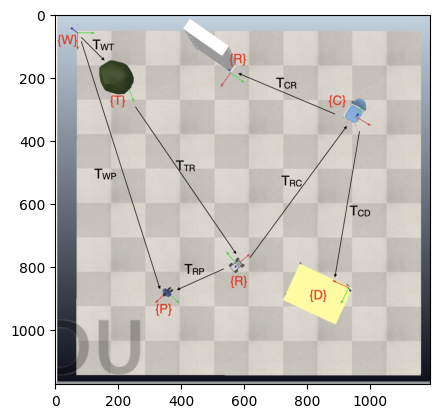

In [11]:
plt.imshow(mpimg.imread('diagrama.png'))

# Exercise 3
Para executar, abra a cena scene.ttt na pasta 3 e rode as celulas a seguir.

In [12]:
def plotReferencial():
    sim.startSimulation()

    # Get Objects Handle
    personHandle = sim.getObject("/Rapha")
    chairHandle = sim.getObject("/Chair")
    treeHandle = sim.getObject("/Tree")
    diningTableHandle = sim.getObject("/diningTable")
    rackHandle = sim.getObject("/Rack")
    robotHanle = sim.getObject("/Robot")

    # Get transformation Matriz from local to a object reference
    result = getTransformationMatrixObject2Object(robotHanle, personHandle, printPlot = True)
    print("Person position from robot pov:")
    print(result, "\n")
    result = getTransformationMatrixObject2Object(robotHanle, chairHandle, printPlot = True)
    print("Chair position from robot pov:")
    print(result, "\n")
    result = getTransformationMatrixObject2Object(robotHanle, treeHandle, printPlot = True)
    print("Tree position from robot pov:")
    print(result, "\n")
    result = getTransformationMatrixObject2Object(robotHanle, diningTableHandle, printPlot = True)
    print("Dining table position from robot pov:")
    print(result, "\n")
    result = getTransformationMatrixObject2Object(robotHanle, rackHandle, printPlot = True)
    print("Rack position from robot pov:")
    print(result, "\n")

    sim.stopSimulation()

Person position from robot pov:
[[-0.99618001  0.08732343  0.         -3.88154268]
 [-0.08732343 -0.99618001  0.          1.36331451]
 [ 0.          0.          1.         -0.5089343 ]
 [ 0.          0.          0.          1.        ]] 

Chair position from robot pov:
[[-0.94112797  0.33805051  0.         10.774784  ]
 [-0.33805051 -0.94112797  0.          2.38276682]
 [ 0.          0.          1.         -0.34713501]
 [ 0.          0.          0.          1.        ]] 

Tree position from robot pov:
[[-0.93975018 -0.34186196  0.          1.82475551]
 [ 0.34186196 -0.93975018  0.         11.97842925]
 [ 0.          0.          1.         -0.5589343 ]
 [ 0.          0.          0.          1.        ]] 

Dining table position from robot pov:
[[-0.76615263 -0.64265866  0.          2.60851355]
 [ 0.64265866 -0.76615263  0.         -4.04799727]
 [ 0.          0.          1.          0.24106114]
 [ 0.          0.          0.          1.        ]] 

Rack position from robot pov:
[[-0.965880

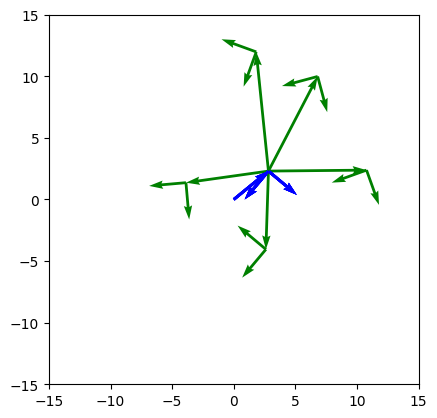

In [13]:
plotReferencial()

# Exercise 4

## 4.1
Para executar, abra a cena scene4.1.ttt na pasta 4 e rode a celula a seguir.

Person position from robot pov:
[[ 0.17353728 -0.9848273   0.          0.23867298]
 [ 0.9848273   0.17353728  0.         -4.350062  ]
 [ 0.          0.          1.         -0.49544539]
 [ 0.          0.          0.          1.        ]] 

Chair position from robot pov:
[[ -0.08445187  -0.99642756   0.          -2.54102501]
 [  0.99642756  -0.08445187   0.         -18.77389131]
 [  0.           0.           1.          -0.1671516 ]
 [  0.           0.           0.           1.        ]] 

Tree position from robot pov:
[[  0.56626167  -0.82422553   0.           9.12617498]
 [  0.82422553   0.56626167   0.         -12.52828503]
 [  0.           0.           1.          -0.37986182]
 [  0.           0.           0.           1.        ]] 

Dining table position from robot pov:
[[ 0.80886621 -0.58799273  0.         -6.50550801]
 [ 0.58799273  0.80886621  0.         -9.3320916 ]
 [ 0.          0.          1.          0.41986738]
 [ 0.          0.          0.          1.        ]] 

Rack posi

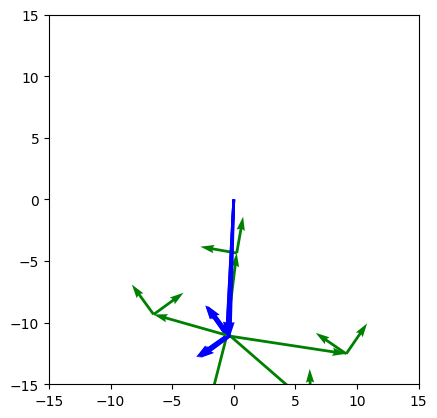

In [14]:
plotReferencial()

## 4.2
Para executar, abra a cena scene4.2.ttt na pasta 4 e rode a celula a seguir.

Person position from robot pov:
[[ 0.17348241 -0.98483697  0.          0.23891534]
 [ 0.98483697  0.17348241  0.         -4.35004821]
 [ 0.          0.          1.         -0.5089343 ]
 [ 0.          0.          0.          1.        ]] 

Chair position from robot pov:
[[ -0.08291681  -0.99655647   0.          -2.57032856]
 [  0.99655647  -0.08291681   0.         -18.77074136]
 [  0.           0.           1.          -0.23309367]
 [  0.           0.           0.           1.        ]] 

Tree position from robot pov:
[[  0.57220305  -0.82011199   0.           9.03481063]
 [  0.82011199   0.57220305   0.         -12.59491271]
 [  0.           0.           1.          -0.37895089]
 [  0.           0.           0.           1.        ]] 

Dining table position from robot pov:
[[ 0.81401365 -0.58084575  0.         -6.58603242]
 [ 0.58084575  0.81401365  0.         -9.27449303]
 [ 0.          0.          1.          0.42013362]
 [ 0.          0.          0.          1.        ]] 

Rack posi

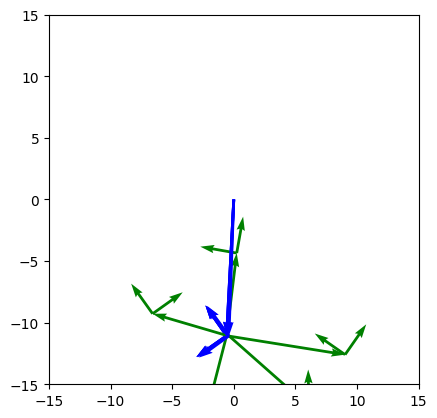

In [15]:
plotReferencial()

## 4.3
Para executar, abra a cena scene4.3.ttt na pasta 4 e rode a celula a seguir.

Person position from robot pov:
[[ 0.17348241 -0.98483697  0.          0.23891534]
 [ 0.98483697  0.17348241  0.         -4.35004821]
 [ 0.          0.          1.         -0.5089343 ]
 [ 0.          0.          0.          1.        ]] 

Chair position from robot pov:
[[ -0.082907    -0.99655729   0.          -2.57051329]
 [  0.99655729  -0.082907     0.         -18.77071615]
 [  0.           0.           1.          -0.29563239]
 [  0.           0.           0.           1.        ]] 

Tree position from robot pov:
[[  0.57220305  -0.82011199   0.           9.03481063]
 [  0.82011199   0.57220305   0.         -12.59491271]
 [  0.           0.           1.          -0.37895089]
 [  0.           0.           0.           1.        ]] 

Dining table position from robot pov:
[[ 0.81401365 -0.58084575  0.         -6.58603242]
 [ 0.58084575  0.81401365  0.         -9.27449303]
 [ 0.          0.          1.          0.42013362]
 [ 0.          0.          0.          1.        ]] 

Rack posi

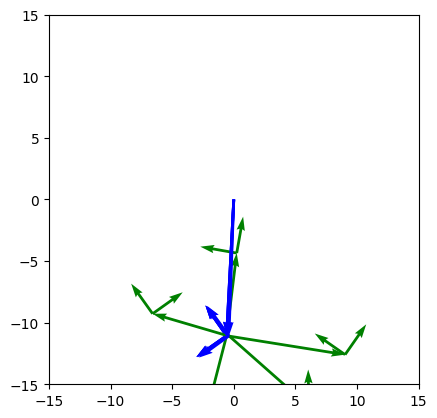

In [16]:
plotReferencial()

# Exercise 5
Para executar, abra a cena scene5.ttt na pasta 5 e rode as celulas a seguir.

## Import Modules

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

## Define Functions

### Get Data from the sensor

In [18]:
'''
readSensorData - It will try to capture the range and angle data from the simulator.
                 The request for the range data is sent in streaming mode to force
                 it to sync with the angle data request which acts as a mutex.

inputs:
    -clientId: simulator client id obtained through a successfull connection with the simulator.
    -range_data_signal_id: string containing the range data signal pipe name.
    -angle_data_signal_id: string containing the angle data signal pipe name.
outputs:
    -returns None if no data is recovered.
    -returns two arrays, one with data range and the other with their angles, if data was 
    retrieved successfully.
'''
def readSensorData(range_data_signal_id="hokuyo_range_data", 
                    angle_data_signal_id="hokuyo_angle_data"):

    # the first call should be non-blocking to avoid getting out-of-sync angle data
    # returnCodeRanges, string_range_data = sim.getStringSignal(range_data_signal_id, sim.simx_opmode_streaming)
    # returnCodeRanges, string_range_data = sim.getStringSignal(range_data_signal_id)

    # print(range_data_signal_id)
    resultCodeRanges = sim.getStringSignal(range_data_signal_id)

    # the second call should block to avoid out-of-sync scenarios
    # between your python script and the simulator's main loop
    # (your script may be slower than the simulator's main loop, thus
    # slowing down data processing)
    # returnCodeAngles, string_angle_data = sim.simxGetStringSignal(angle_data_signal_id, sim.simx_opmode_blocking)
    
    resultCodeAngles = sim.getStringSignal(angle_data_signal_id)

    # check the if both data were obtained correctly
    if resultCodeRanges != None and resultCodeAngles != None:
        # unpack data from range and sensor messages
        raw_range_data = sim.unpackFloatTable(resultCodeRanges)
        raw_angle_data = sim.unpackFloatTable(resultCodeAngles)

        return raw_range_data, raw_angle_data

    # return none in case were nothing was gotten from the simulator
    return None, None


In [19]:

def draw_laser_data(laser_data, max_sensor_range=5, ax = None):
    
    if (ax == None):
        fig = plt.figure(figsize=(6,6), dpi=100)
        ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

In [20]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

import numpy as np
import matplotlib.pyplot as plt
import time
import math

def laserPlot():
    client = RemoteAPIClient()
    sim = client.require('sim')
    sim.setStepping(True)


    sim.startSimulation()

    print ('Connected to remote API server')
        
    # Iniciando a simulação
    # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
    # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

    # Handle para o ROBÔ    
    robotname = "/Pioneer_p3dx"
    robotHandle = sim.getObject(robotname)     

    # Handle para as juntas das RODAS
    l_wheel = sim.getObject(robotname + '_leftMotor')
    r_wheel = sim.getObject(robotname + '_rightMotor')    

    # Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"

    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas

    range_data = None
    while range_data == None:
        range_data = sim.getStringSignal(laser_range_data)
        sim.step()

    # Prosseguindo com as leituras
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T

    draw_laser_data(laser_data)

    pos = sim.getObjectPosition(robotHandle, sim.handle_world)        
    print('Pos: ', pos)

    #raise SystemExit()

    # Dados do Pioneer
    L = 0.381   # Metros
    r = 0.0975  # Metros

    sim.stopSimulation()
        
    print ('Program ended')

Connected to remote API server
Pos:  [-6.618541330137701, -5.025120826629084, 0.4386452549528606]
Program ended


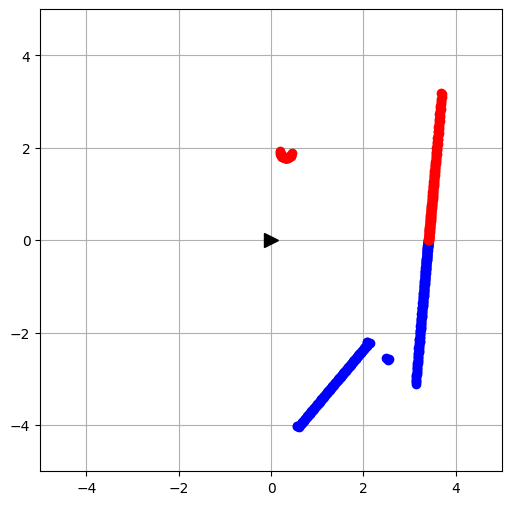

In [21]:
laserPlot()

## 5.1
Para executar, abra a cena scene5.1.ttt na pasta 5 e rode a celula a seguir.

Connected to remote API server
Pos:  [-6.618541330137701, -5.025120826629084, 0.4386452549528606]
Program ended


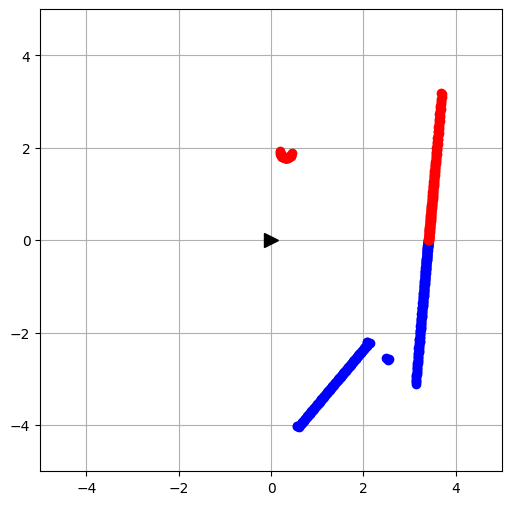

In [22]:
laserPlot()

## 5.2
Para executar, abra a cena scene5.2.ttt na pasta 5 e rode a celula a seguir.

Connected to remote API server
Pos:  [-6.618541330137701, -5.025120826629084, 0.4386452549528606]
Program ended


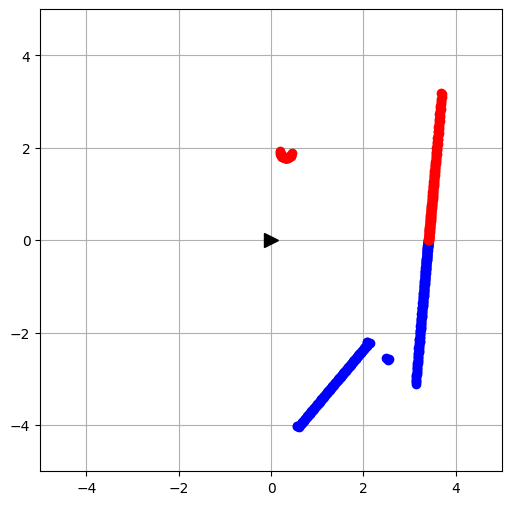

In [23]:
laserPlot()

## 5.3
Para executar, abra a cena scene5.3.ttt na pasta 5 e rode a celula a seguir.

Connected to remote API server
Pos:  [-6.618541330137701, -5.025120826629084, 0.4386452549528606]
Program ended


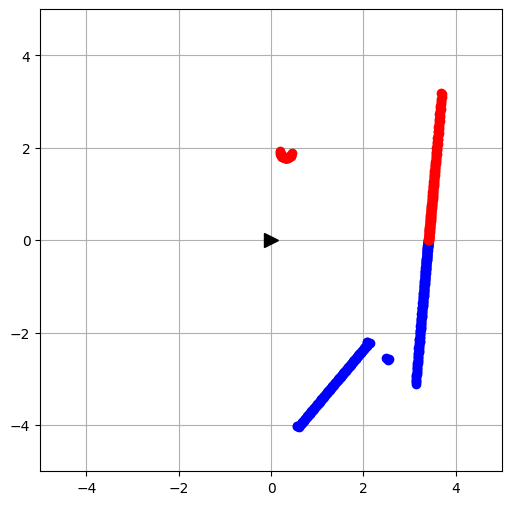

In [24]:
laserPlot()

## Exercise 6
Para executar, abra qualquer cena na pasta 5.

In [29]:

def draw_laser_data_World_Ref(MTrans, laser_data, max_sensor_range=5, ax = None):
    
    if (ax == None):
        fig = plt.figure(figsize=(6,6), dpi=100)
        ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            p = np.zeros((4, 1))
            
            # Eixo x
            p[0] = dist * np.cos(ang)
            # Eixo y
            p[1] = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'

            # Eixo Z, como é 2D o valor pode ser zero
            # p[2] = 0
            # Perspectiva
            p[3] = 1

            new_point = MTrans @ p

            ax.plot(new_point[0], new_point[1], 'o', color=c)

    ax.plot(0, 0, 'k>', markersize=10)

        
    ax.grid()
    # ax.set_xlim([-max_sensor_range, max_sensor_range])
    # ax.set_ylim([-max_sensor_range, max_sensor_range])

Connected to remote API server
Program ended


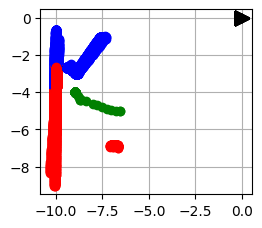

In [32]:
sim.startSimulation()

print ('Connected to remote API server')
    
    
# Iniciando a simulação
# Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
# e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

# Handle para o ROBÔ    
robotname = "/Pioneer_p3dx"
robotHandle = sim.getObject(robotname)     

# Handle para o Laser
lasername = "/Pioneer_p3dx/fastHokuyo"
laserHandle = sim.getObject(lasername)


# Handle para as juntas das RODAS
l_wheel = sim.getObject(robotname + '_leftMotor')
r_wheel = sim.getObject(robotname + '_rightMotor')    

#print(T_wl)

# Handle para os dados do LASER
laser_range_data = "hokuyo_range_data"
laser_angle_data = "hokuyo_angle_data"

# Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
# Em loop até garantir que as leituras serão válidas

range_data = None
while range_data == None:
    range_data = sim.getStringSignal(laser_range_data)
    # sim.step() responsável por sincronizar com a emulação
    sim.step()

# Prosseguindo com as leituras
raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
laser_data = np.array([raw_angle_data, raw_range_data]).T

#raise SystemExit()

# Dados do Pioneer
L = 0.381   # Metros
r = 0.0975  # Metros

###################################################

#        Maybe this part is the exercise 6

###################################################

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(121, aspect='equal')
#ax1 = fig.add_subplot(122, aspect='equal')

t = 0
# Lembrar de habilitar o 'Real-time mode'
startTime=time.time()
lastTime = startTime
while t < 20:
    
    now = time.time()
    dt = now - lastTime

    # Fazendo leitura do laser   
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T

    # Matriz de transformação do laser para o mundo
    ## Matrix de transformação laser para o robo
    T_rl = getTransformationMatrix(laserHandle, robotHandle)
    ## Matrix de transformação robo para o mundo
    T_rw = getTransformationMatrix(robotHandle)
    ## Matrix de transformaçao laser para o mundo
    T_wl = T_rw @ T_rl



    pos = sim.getObjectPosition(robotHandle, sim.handle_world)        
    # print('Pos: ', pos)

    ax.plot(pos[0], pos[1], 'o', color='g')

    draw_laser_data_World_Ref(T_wl, laser_data, ax = ax)
    # draw_laser_data(laser_data, ax = ax1)
    
    # Velocidade básica (linear, angular)
    v = 0
    w = np.deg2rad(0)      

    frente = int(len(laser_data)/2)
    lado_direito = int(len(laser_data)*1/4)
    lado_esquerdo = int(len(laser_data)*3/4)
    
    if laser_data[frente, 1] > 2:
        v = .5
        w = 0
    elif laser_data[lado_direito, 1] > 2:
        v = 0
        w = np.deg2rad(-30)
    elif laser_data[lado_esquerdo, 1] > 2:
        v = 0
        w = np.deg2rad(30)
    
    # Isso é o modelo cinemático, estudaremos detalhadamente depois!
    wl = v/r - (w*L)/(2*r)
    wr = v/r + (w*L)/(2*r)
    
    # Enviando velocidades
    sim.setJointTargetVelocity(l_wheel, wl)
    sim.setJointTargetVelocity(r_wheel, wr)        

    t = t + dt  
    lastTime = now

# Parando o robô    
sim.setJointTargetVelocity(r_wheel, 0)
sim.setJointTargetVelocity(l_wheel, 0)        
    
sim.stopSimulation()

print ('Program ended')